In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data = pd.read_csv('Uni_linear.txt', header = None)
x = data.iloc[:,0]
y = data.iloc[:,1]

data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Scatter plot of training data')

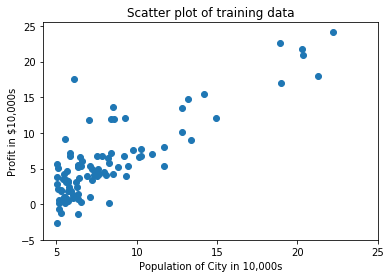

In [10]:
plt.scatter(x, y)
plt.xticks(np.arange(5, 30, step = 5))
plt.yticks(np.arange(-5, 30, step = 5))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

In [11]:
m = len(x)
X = x[:, np.newaxis]
Y = y[:, np.newaxis]
theta = np.zeros((2,1))
ones = np.ones((m,1))
X = np.hstack((ones, X))

In [12]:
def computeCost(X,y,theta):
    predictions = np.dot(X, theta)
    square_err = (predictions - y) ** 2
    return 1/(2*m) * np.sum(square_err)

J = computeCost(X, Y, theta)
print('Cost: '+ str(J))

Cost: 32.072733877455676


In [13]:
def gradientDescent(X, y, theta, alpha, iterations):
    J_history = []
    for i in range(iterations):
        predictions = np.dot(X, theta)
        temp = np.dot(X.T, (predictions - y))
        theta = theta - (alpha/m) * temp
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

alpha = 0.01
iterations = 1500
theta1, J_history = gradientDescent(X, Y, theta, alpha, iterations)
print('Theta: \n'+ str(theta1))
print('\nCost: '+ str(computeCost(X, Y, theta1)))

Theta: 
[[-3.63029144]
 [ 1.16636235]]

Cost: 4.483388256587725


Text(0.5, 1.0, 'Cost function using Gradient Descent')

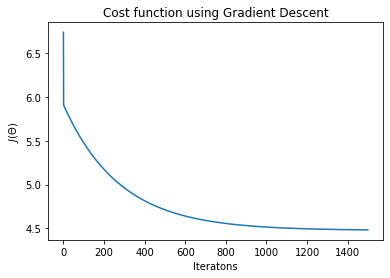

In [14]:
plt.plot(J_history)
plt.xlabel('Iteratons')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')

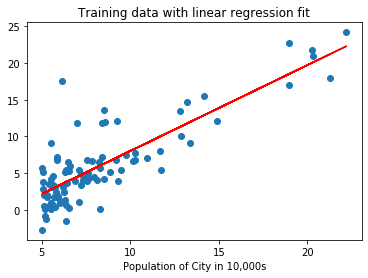

In [15]:
plt.scatter(x, y)
plt.xticks(np.arange(5, 30, step = 5))
plt.yticks(np.arange(-5, 30, step = 5))
plt.xlabel('Population of City in 10,000s')
plt.title('Training data with linear regression fit')
plt.plot(x, np.dot(X, theta1), color = 'r')

In [16]:
def predict(X, theta):
    return np.dot(X, theta)

pop = float(input('Enter population in 10,000s: '))
pred_val = predict([1, pop], theta1) * 10000

print('For population of '+ str((pop * 10000)) +' ,we predict a profit of $' + str(np.round(pred_val[0], 3)))

Enter population in 10,000s: 6.3
For population of 63000.0 ,we predict a profit of $37177.914
